In [184]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_moons, make_blobs

## Plot functions

In [188]:
# def plot_decision_boundary(model, dataset):
#     class0 = dataset[dataset['y'] == 0]
#     class1 = dataset[dataset['y'] == 1]

#     plt.scatter(class0['0'], class0['1'], marker='o', label='Class 0', s=10, c='red')
#     plt.scatter(class1['0'], class1['1'], marker='o', label='Class 1', s=10, c='blue')

#     x_vals = np.linspace(4, 12, 100)
#     y_vals = (-model.weights[0] * x_vals - model.bias) / model.weights[1]
#     plt.plot(x_vals, y_vals, label='Decision Boundary')
#     plt.title(f'learning rate: {model.learning_rate}, number of epochs: {len(model.errors)}')
#     plt.xlabel('Feature 0')
#     plt.ylabel('Feature 1')
#     plt.legend()
#     plt.show()

In [189]:
def plot_decision_boundary(model, X, y, extend=0.2):
    f1_min = X[:, 0].min() - extend
    f1_max = X[:, 0].max() + extend
    f2_min = X[:, 1].min() - extend
    f2_max = X[:, 1].max() + extend
    f1m, f2m = np.meshgrid(np.arange(f1_min, f1_max, 0.01), np.arange(f2_min, f2_max, 0.01))
    Z = np.array([model.predict([f1, f2]) for f1, f2 in np.c_[f1m.ravel(), f2m.ravel()]])
    Z = Z.reshape(f1m.shape)

    plt.contourf(f1m, f2m, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, marker='o', s=10)
    plt.title(f'learning rate: {model.learning_rate}, number of epochs: {len(model.errors)}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

In [190]:
def plot_error_accuracy(model):
    plt.figure()

    plt.plot(list(range(1, len(model.errors) + 1)), model.errors, label='Error', marker='s', color='red', linestyle='-')
    plt.ylabel('Error', color='red')
    plt.tick_params(axis='y', labelcolor='red')

    plt.twinx()
    plt.plot(list(range(1, len(model.errors) + 1)), model.accuracies, label='Accuracy', marker='o', color='blue', linestyle='-')
    plt.ylabel('Accuracy', color='blue')
    plt.tick_params(axis='y', labelcolor='blue')

    plt.xlabel('Epoch')

    plt.title(f'learning rate: {model.learning_rate}, number of epochs: {len(model.errors)}')
    # plt.legend(loc='upper left')
    plt.grid(True)
    plt.show()

## Q2

In [191]:
df_linear = pd.read_csv('./linear.csv')
df_linear

,0,1,y
0,8.767747,3.995108,0
1,5.938750,5.387562,0
2,8.605291,-2.652032,1
3,7.488204,5.810372,0
4,7.653939,4.499167,0
...,...,...,...
995,7.211895,7.904023,0
996,8.974970,-3.063078,1
997,7.324660,6.607004,0
998,6.889562,4.775597,0


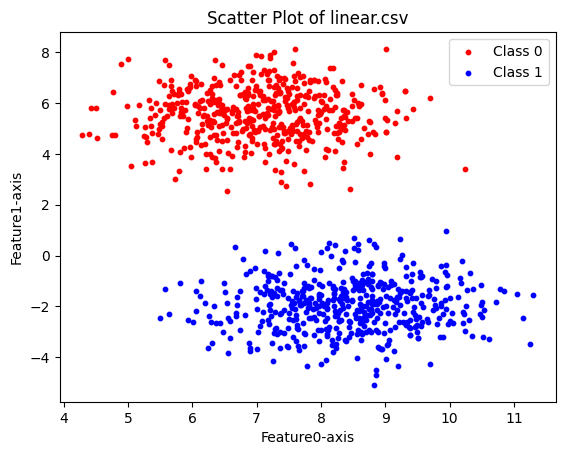

In [192]:
plt.scatter(df_linear[df_linear['y'] == 0]['0'], df_linear[df_linear['y'] == 0]['1'], marker='o', label='Class 0', s=10, c='red')
plt.scatter(df_linear[df_linear['y'] == 1]['0'], df_linear[df_linear['y'] == 1]['1'], marker='o', label='Class 1', s=10, c='blue')
plt.xlabel('Feature0-axis')
plt.ylabel('Feature1-axis')
plt.title('Scatter Plot of linear.csv')
plt.legend()
plt.show()

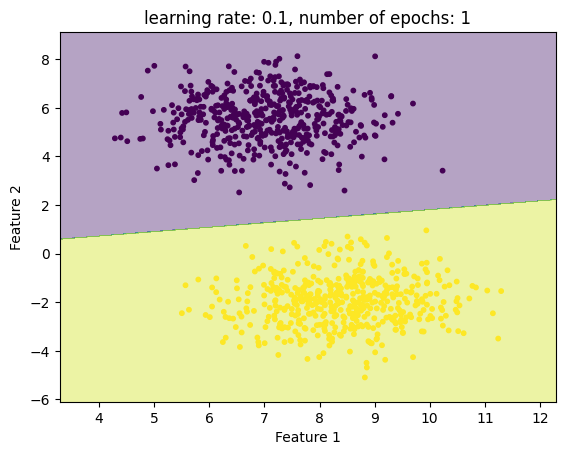

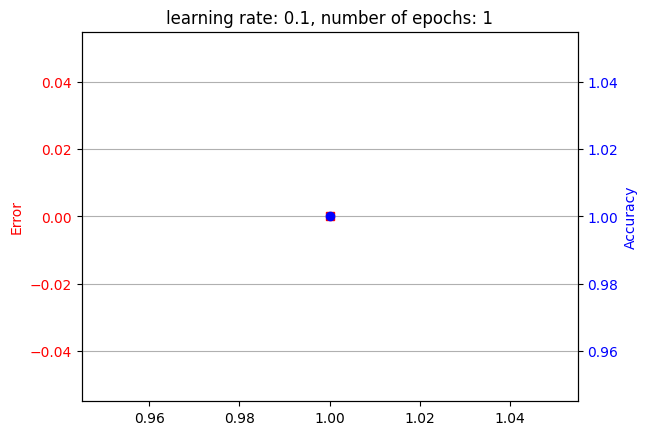

final error: 0


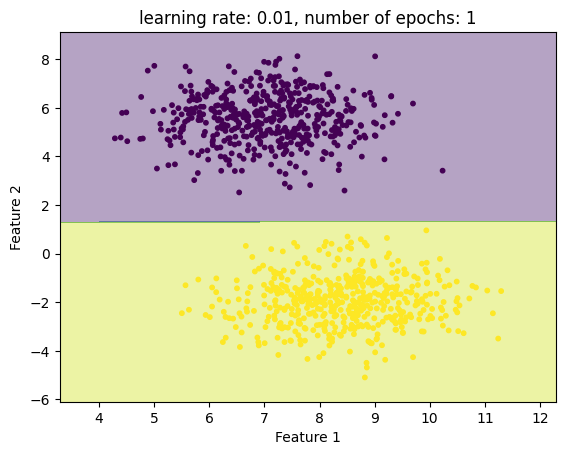

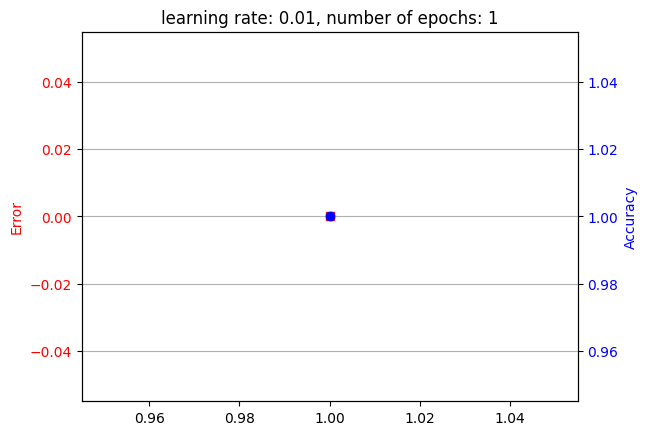

final error: 0


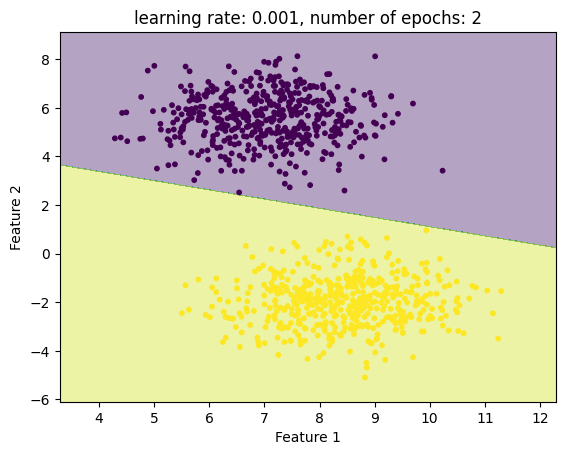

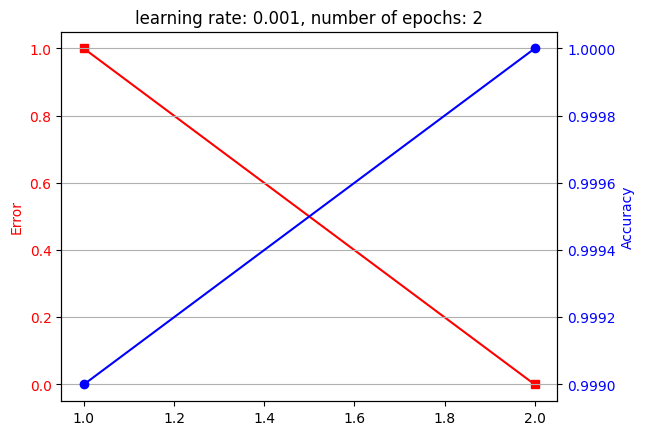

final error: 0


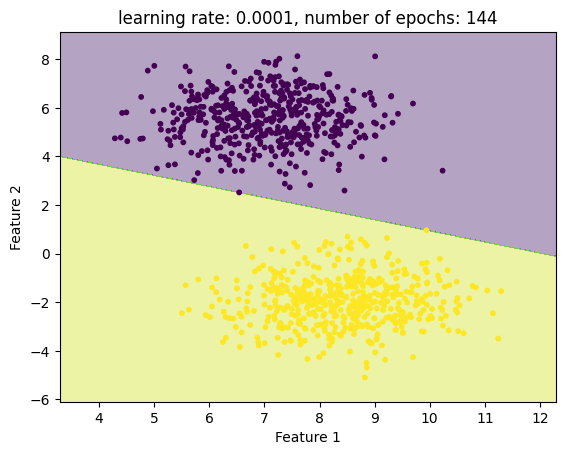

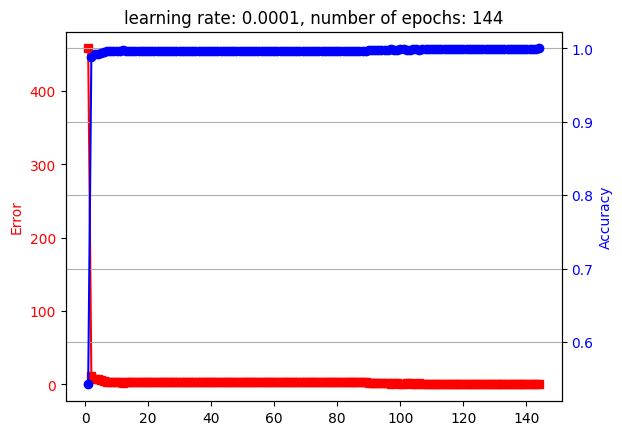

final error: 0


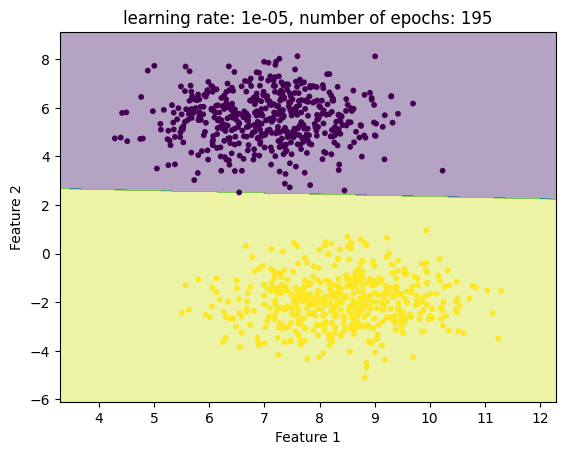

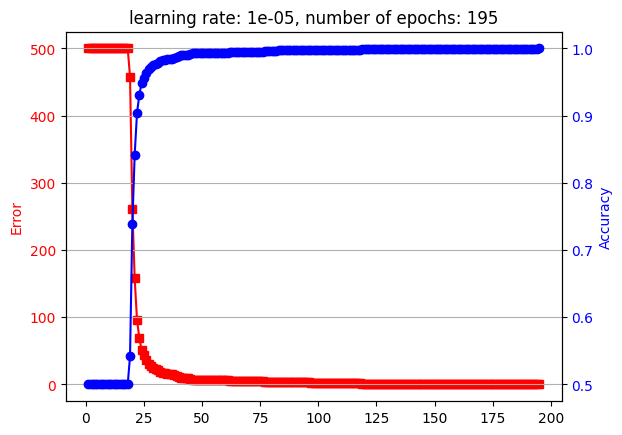

final error: 0


In [193]:
class PerceptronQ2:
    def __init__(self, learning_rate, input_size):
        self.learning_rate = learning_rate
        self.weights = np.random.rand(input_size)
        self.bias = np.random.rand()
        self.errors = []
        self.accuracies = []

    def predict(self, inputs):
        I = np.dot(inputs, self.weights) + self.bias
        if I > 0:
            return 1
        else:
            return 0

    def train(self, inputs, labels, n_epochs=np.inf):
        while len(self.errors) < n_epochs:
            for i in range(len(inputs)):
                output = self.predict(inputs[i])
                error = labels[i] - output
                if error != 0:
                    self.weights += self.learning_rate * error * inputs[i]
                    self.bias += self.learning_rate * error

            predicts = []
            epoch_error = 0
            for i in range(len(inputs)):
                output = self.predict(inputs[i])
                predicts += [output]
                epoch_error += abs(labels[i] - output)

            self.accuracies += [accuracy_score(labels, predicts)]
            self.errors += [epoch_error]

            if epoch_error == 0:
                break

def train_and_plot_Q2(dataset, learning_rate):
    X, y = np.array(dataset[['0', '1']]), np.array(dataset['y'])
    perceptron = PerceptronQ2(input_size=2, learning_rate=learning_rate)
    perceptron.train(X, y)
    # plot_decision_boundary(perceptron, dataset)
    plot_decision_boundary(perceptron, X, y, extend=1)
    plot_error_accuracy(perceptron)

    print(f'final error: {perceptron.errors[-1]}')


lr_list = [0.1, 0.01, 0.001, 0.0001, 0.00001]
for lr in lr_list:
    train_and_plot_Q2(df_linear, learning_rate=lr)


## Q3

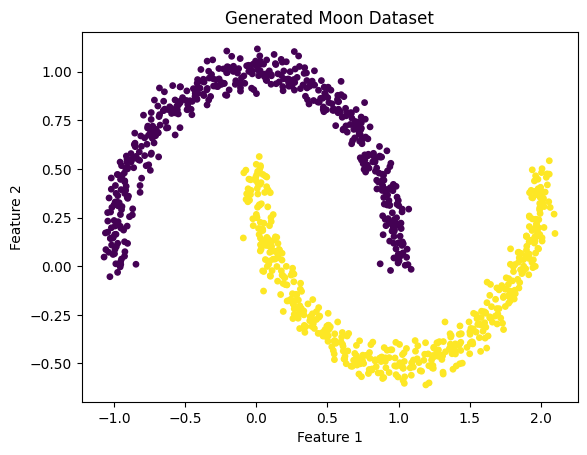

In [23]:
X_moons, y_moons = make_moons(n_samples=1000, noise=0.05, random_state=10)

# plt.figure(figsize=(8, 6))
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=y_moons, s=15)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Generated Moon Dataset")
plt.show()

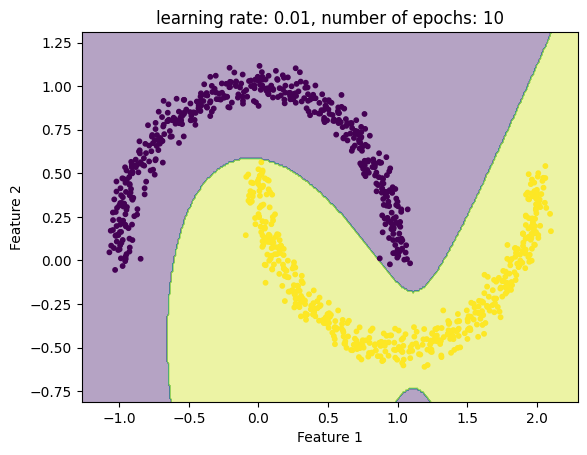

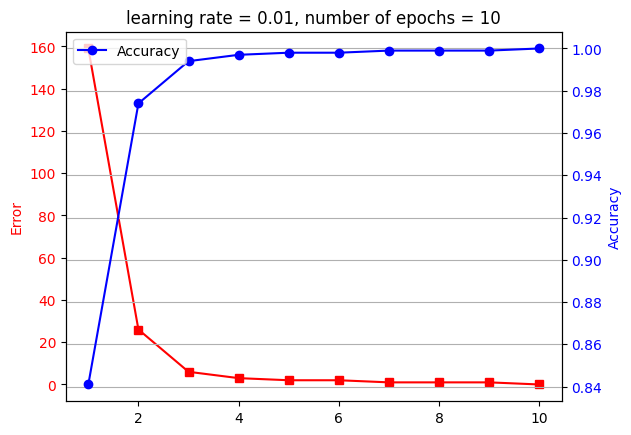

final error: 0


In [52]:
class PerceptronQ3:
    def __init__(self, learning_rate, weight_size=6):
        self.learning_rate = learning_rate
        self.weight_size = weight_size
        self.weights = np.random.rand(self.weight_size)
        self.bias = np.random.rand()
        self.errors = []
        self.accuracies = []

    def inputs2(self, inputs):
        x1 = inputs[0]
        x2 = inputs[1]
        return np.array([x1, x2, x1**2, x2**2, x1**3, x2**3])
        # return np.array([x1, x2, x1*x2, x1**2, x2**2, (x1**2)*x2, x1*(x2**2), (x1**2)*(x2**2), x1**3, x2**3])
        # return np.array([x1, x2, x1*x2, x1**2, x2**2])

    def predict(self, inputs):
        I = np.dot(self.inputs2(inputs), self.weights) + self.bias
        if I > 0:
            return 1
        else:
            return 0

    def train(self, inputs, labels, n_epochs=np.inf):
        while len(self.errors) < n_epochs:
            for i in range(len(inputs)):
                output = self.predict(inputs[i])
                error = labels[i] - output
                if error != 0:
                    self.weights += self.learning_rate * error * self.inputs2(inputs[i])
                    self.bias += self.learning_rate * error

            predicts = []
            epoch_error = 0
            for i in range(len(inputs)):
                output = self.predict(inputs[i])
                predicts += [output]
                epoch_error += abs(labels[i] - output)

            self.accuracies += [accuracy_score(labels, predicts)]
            self.errors += [epoch_error]

            if epoch_error == 0:
                break

def train_and_plot_Q3(X, y, learning_rate):
    perceptron = PerceptronQ3(learning_rate=learning_rate)
    perceptron.train(X, y)
    plot_decision_boundary(perceptron, X, y)
    plot_error_accuracy(perceptron)

    print(f'final error: {perceptron.errors[-1]}')

# lr_list = [1.0, 0.1, 0.01, 0.001, 0.0001, 0.00001]
# for lr in lr_list:
#     train_and_plot_Q3(X=X_moons, y=y_moons, learning_rate=lr)

train_and_plot_Q3(X=X_moons, y=y_moons, learning_rate=0.01)

## Q4

### Datasets

#### Linearly Separable Dataset

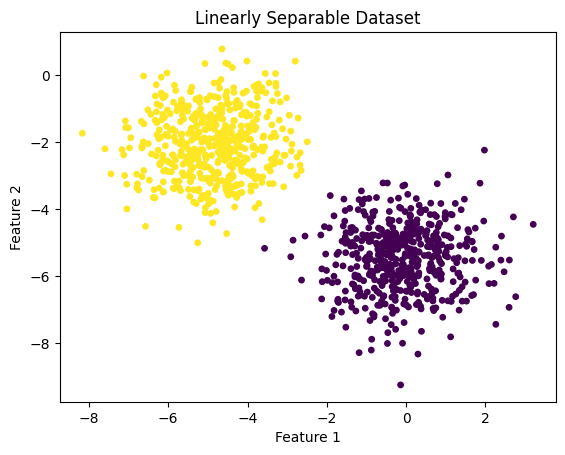

In [194]:
X_ls, y_ls = make_blobs(n_samples=1000, centers=2, random_state=50)

plt.scatter(X_ls[:, 0], X_ls[:, 1], c=y_ls, s=15)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Linearly Separable Dataset")
plt.show()

#### Linearly Quasi Separable Dataset

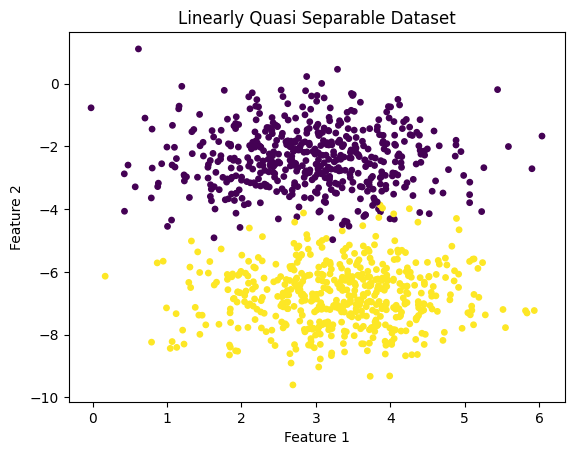

In [195]:
X_lqs, y_lqs = make_blobs(n_samples=1000, centers=2, random_state=30)

plt.scatter(X_lqs[:, 0], X_lqs[:, 1], c=y_lqs, s=15)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Linearly Quasi Separable Dataset")
plt.show()

#### Linearly Inseparable Dataset

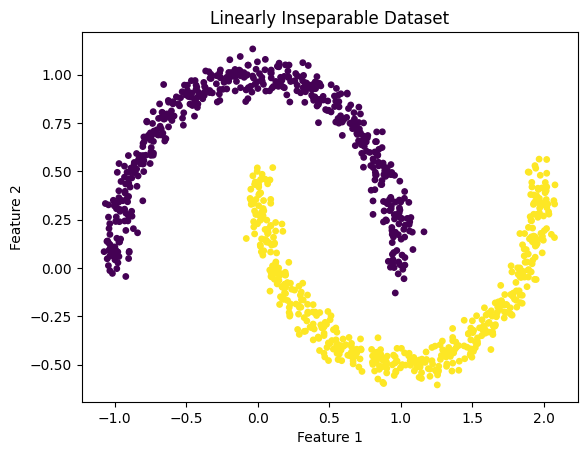

In [196]:
X_li, y_li = make_moons(n_samples=1000, noise=0.05, random_state=0)
# X_li, y_li = [], []
# for i, j in zip(X_li_, y_li_):
#     if i[0] >= 0:
#         X_li += [i]
#         y_li += [j]
# X_li, y_li = np.array(X_li), np.array(y_li)

plt.scatter(X_li[:, 0], X_li[:, 1], c=y_li, s=15)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Linearly Inseparable Dataset")
plt.show()

### Implementations

#### ADALINE (Adaptive Linear Neuron or Adaptive Linear Element)

In [197]:
class ADALINEQ4:
    def __init__(self, learning_rate, input_size=2):
        self.learning_rate = learning_rate
        self.weights = np.random.rand(input_size)
        self.bias = np.random.rand()
        self.mses = []
        self.errors = []
        self.accuracies = []

    def calcI(self, inputs):
        return np.dot(inputs, self.weights) + self.bias

    def predict(self, inputs):
        I = self.calcI(inputs)
        if I > 0:
            return +1
        else:
            return -1

    def train(self, inputs, labels, n_epochs=np.inf):
        labels = np.copy(labels)
        labels[labels == 0] = -1
        old_epochs = len(self.errors)
        while (len(self.errors) - old_epochs) < n_epochs:
            mse = 0
            for i in range(len(labels)):
                I = self.calcI(inputs[i])
                error = labels[i] - I
                self.weights += self.learning_rate * error * inputs[i]
                self.bias += self.learning_rate * error
                mse += (error**2)
            mse /= len(inputs)
            self.mses += [mse]

            predicts = []
            epoch_error = 0
            for i in range(len(labels)):
                output = self.predict(inputs[i])
                predicts += [output]
                epoch_error += abs(labels[i] - output)

            self.accuracies += [accuracy_score(labels, predicts)]
            self.errors += [epoch_error]

            if epoch_error == 0:
                break


def train_and_plot_AQ4(X, y, learning_rate):
    adaline = ADALINEQ4(learning_rate=learning_rate)
    adaline.train(inputs=X, labels=y, n_epochs=20)
    plot_decision_boundary(adaline, X, y)
    plot_error_accuracy(adaline)

    print(f'final accuracy: {adaline.accuracies[-1]}')
    print(f'final error: {adaline.errors[-1]}')
    print(f'final mse: {adaline.mses[-1]}')
    print(adaline.mses)


# train_and_plot_AQ4(X=X_ls, y=y_ls, learning_rate=0.0001)

#### Perceptron

In [198]:
class PerceptronQ4:
    def __init__(self, learning_rate, input_size=2, learn_bias=True):
        self.learning_rate = learning_rate
        self.weights = np.random.rand(input_size)
        self.errors = []
        self.accuracies = []

        self.bias = np.random.rand() if learn_bias else None

    def predict(self, inputs, bias=None):
        if self.bias == None:
            I = np.dot(inputs, self.weights) + bias
        else:
            I = np.dot(inputs, self.weights) + self.bias

        if I > 0:
            return 1
        else:
            return 0

    def train(self, inputs, labels, n_epochs=np.inf, bias=None):
        old_epochs = len(self.errors)
        while (len(self.errors) - old_epochs) < n_epochs:
            for i in range(len(labels)):
                output = self.predict(inputs[i], bias)
                error = labels[i] - output
                if error != 0:
                    self.weights += self.learning_rate * error * inputs[i]
                    if self.bias != None:
                        self.bias += self.learning_rate * error

            predicts = []
            epoch_error = 0
            for i in range(len(labels)):
                output = self.predict(inputs[i], bias)
                predicts += [output]
                epoch_error += abs(labels[i] - output)

            self.accuracies += [accuracy_score(labels, predicts)]
            self.errors += [epoch_error]

            if epoch_error == 0:
                break


def train_and_plot_PQ4(X, y, learning_rate):
    perceptron = PerceptronQ4(learning_rate=learning_rate)
    perceptron.train(X, y, n_epochs=20)
    plot_decision_boundary(perceptron, X, y)
    plot_error_accuracy(perceptron)

    print(f'final accuracy: {perceptron.accuracies[-1]}')
    print(f'final error: {perceptron.errors[-1]}')

# train_and_plot_PQ4(X=X_ls, y=y_ls, learning_rate=0.01)

#### ADALINE + Perceptron

In [199]:
class ADALINE_Perceptron_Q4:
    def __init__(self, adaline_lr, perceptron_lr, input_size=2):
        self.adaline = ADALINEQ4(learning_rate=adaline_lr)
        self.perceptron = PerceptronQ4(learning_rate=perceptron_lr, learn_bias=False)
        self.learning_rate = f'adaline_lr: {adaline_lr}, perceptron_lr: {perceptron_lr}'
        self.errors = []
        self.accuracies = []

    def predict(self, inputs):
        p_bias = self.adaline.predict(inputs)
        return self.perceptron.predict(inputs, bias=p_bias)

    def train(self, inputs, labels, n_epochs=np.inf):
        while len(self.errors) < n_epochs:
            for i in range(len(inputs)):
                self.adaline.train(np.array([inputs[i]]), np.array([labels[i]]), n_epochs=1)
                p_bias = self.adaline.predict(np.array([inputs[i]]))

                self.perceptron.train(np.array([inputs[i]]), np.array([labels[i]]), n_epochs=1, bias=p_bias)
                # output = self.perceptron.predict(np.array([inputs[i]]), bias=p_bias)

            predicts = []
            epoch_error = 0
            for i in range(len(inputs)):
                output = self.predict(inputs[i])
                predicts += [output]
                epoch_error += abs(labels[i] - output)

            self.accuracies += [accuracy_score(labels, predicts)]
            self.errors += [epoch_error]

            if epoch_error == 0:
                break

def train_and_plot_APQ4(X, y, adaline_lr, perceptron_lr):
    apq4 = ADALINE_Perceptron_Q4(adaline_lr=adaline_lr, perceptron_lr=perceptron_lr)
    apq4.train(X, y, n_epochs=100)
    plot_decision_boundary(apq4, X, y)
    plot_error_accuracy(apq4)

    print(f'final accuracy: {apq4.accuracies[-1]}')
    print(f'final error: {apq4.errors[-1]}')

# train_and_plot_APQ4(X=X_ls, y=y_ls, adaline_lr=0.0001, perceptron_lr=0.01)

### Eperiments

#### Eperiment ADALINE + Perceptron

##### ADALINE + Perceptron on Linearly Separable Dataset

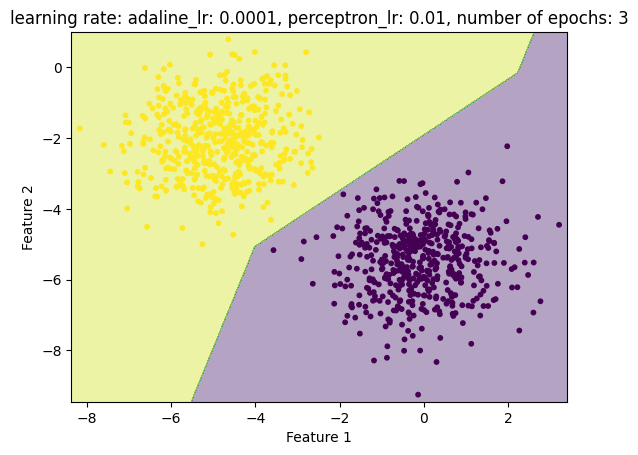

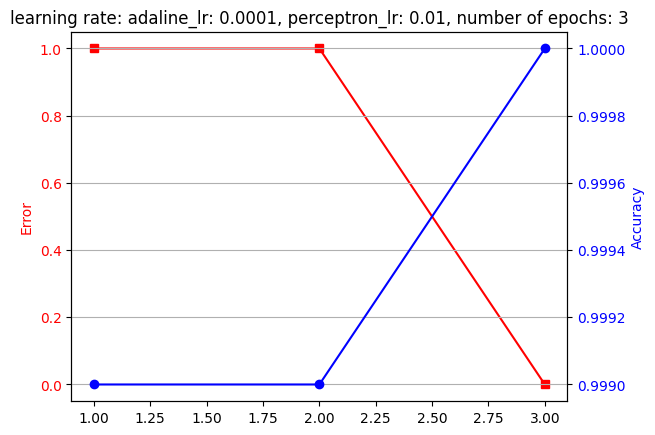

final accuracy: 1.0
final error: 0


In [201]:
train_and_plot_APQ4(X=X_ls, y=y_ls, adaline_lr=0.0001, perceptron_lr=0.01)

##### ADALINE + Perceptron on Linearly Quasi Separable Dataset

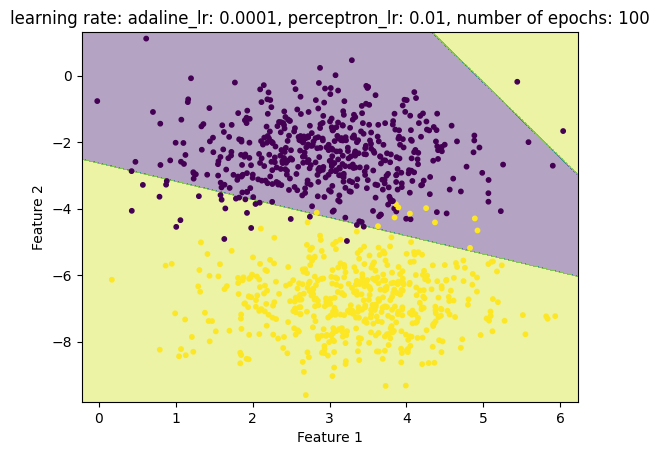

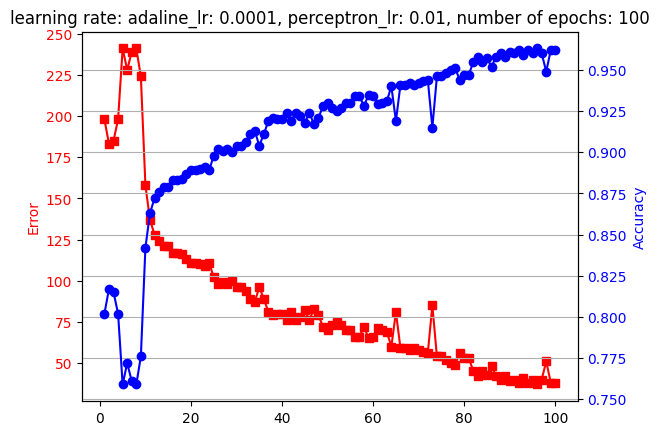

final accuracy: 0.962
final error: 38


In [214]:
train_and_plot_APQ4(X=X_lqs, y=y_lqs, adaline_lr=0.0001, perceptron_lr=0.01)

##### ADALINE + Perceptron on Linearly Inseparable Dataset

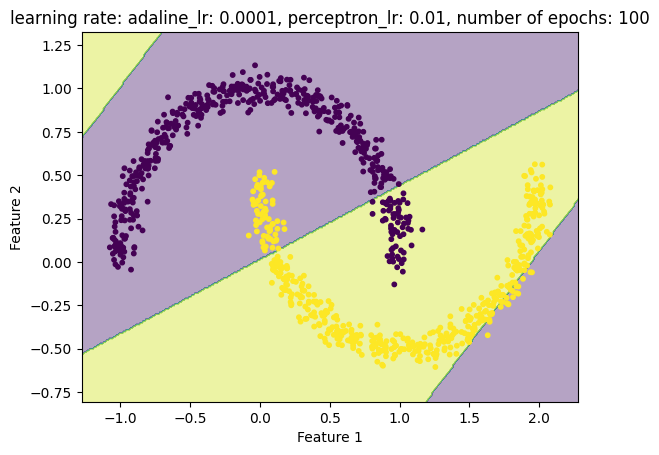

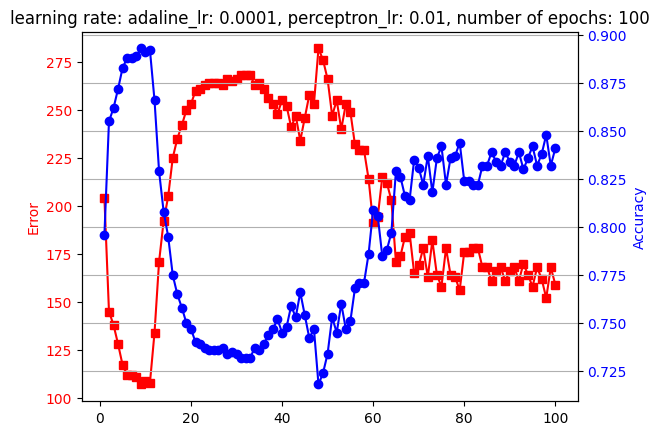

final accuracy: 0.841
final error: 159


In [215]:
train_and_plot_APQ4(X=X_li, y=y_li, adaline_lr=0.0001, perceptron_lr=0.01)

#### A) Eperiment ADALINE

##### ADALINE on Linearly Separable Dataset

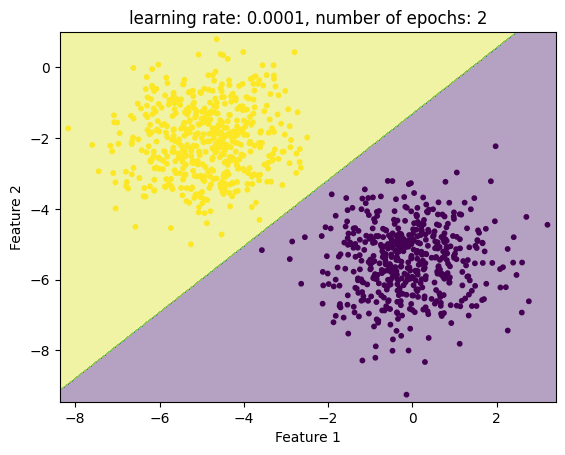

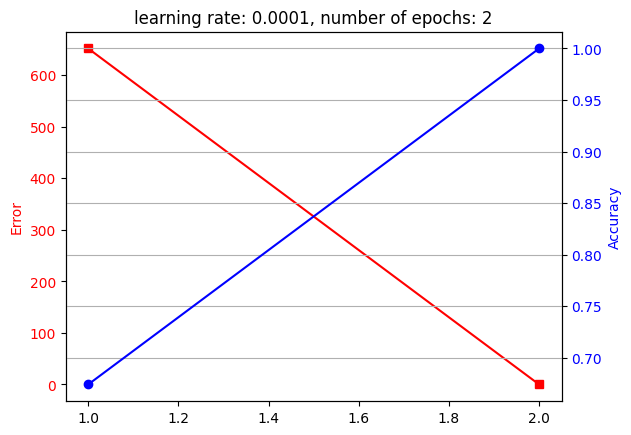

final accuracy: 1.0
final error: 0
final mse: 0.38065010726681964
[2.6768301735343516, 0.38065010726681964]


In [212]:
train_and_plot_AQ4(X=X_ls, y=y_ls, learning_rate=0.0001)

##### ADALINE on Linearly Quasi Separable Dataset

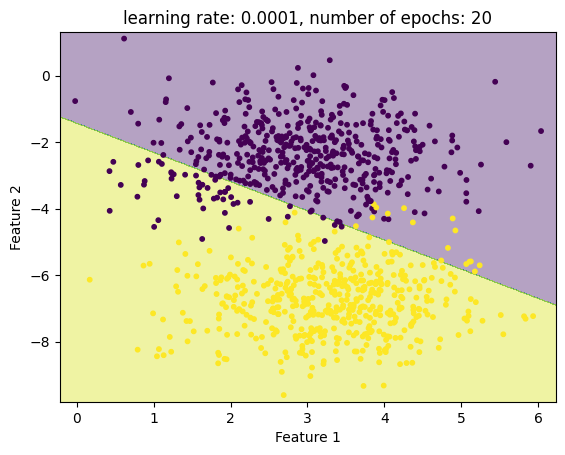

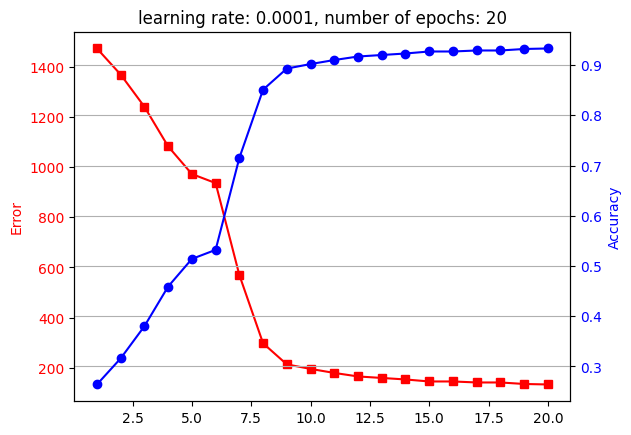

final accuracy: 0.933
final error: 134
final mse: 0.32498450192683276
[4.977530329454037, 3.200090214893103, 2.2506378191839147, 1.6176600379289037, 1.1955126225933104, 0.913679665377602, 0.7252293586816021, 0.5989319812144382, 0.514006419354178, 0.45662423324231255, 0.41758341434656127, 0.39076047276992193, 0.3720804338221622, 0.3588314574417413, 0.3492087739506809, 0.3420112099759149, 0.33643925009713266, 0.33196066199664515, 0.3282210795653285, 0.32498450192683276]


In [210]:
train_and_plot_AQ4(X=X_lqs, y=y_lqs, learning_rate=0.0001)

##### ADALINE on Linearly Inseparable Dataset

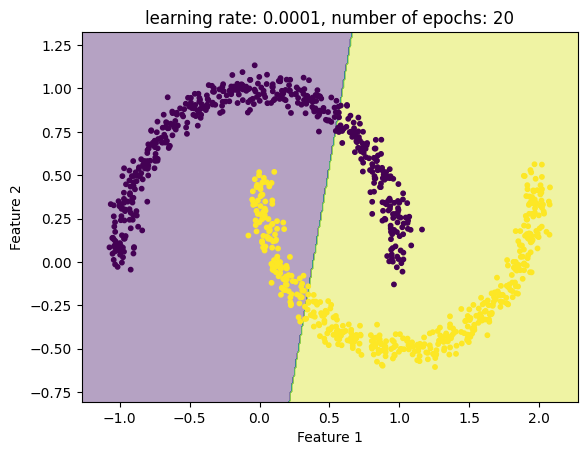

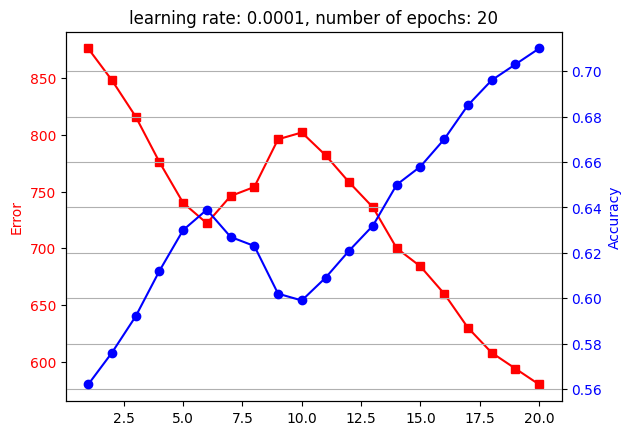

final accuracy: 0.71
final error: 580
final mse: 0.6223466934380715
[1.5625517757114478, 1.4290386670594788, 1.3164420362231135, 1.220720537897484, 1.1387250626021743, 1.0679850022321227, 1.00654806893049, 0.9528599393708805, 0.9056735546376384, 0.8639805369565671, 0.8269591306760977, 0.7939345149434838, 0.7643484015296682, 0.7377356207791138, 0.713705983757144, 0.6919301425735819, 0.6721284929133119, 0.6540624020704137, 0.6375272237483074, 0.6223466934380715]


In [205]:
train_and_plot_AQ4(X=X_li, y=y_li, learning_rate=0.0001)

#### B) Eperiment Perceptron

##### Perceptron on Linearly Separable Dataset

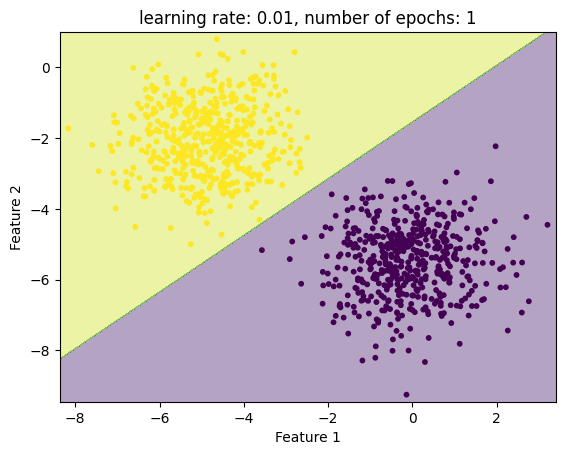

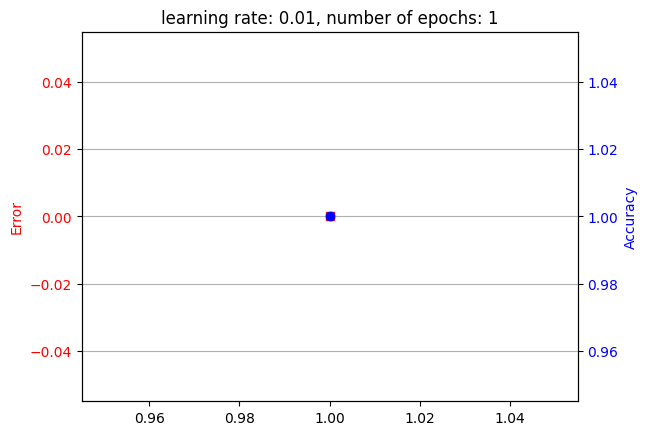

final accuracy: 1.0
final error: 0


In [206]:
train_and_plot_PQ4(X=X_ls, y=y_ls, learning_rate=0.01)

##### Perceptron on Linearly Quasi Separable Dataset

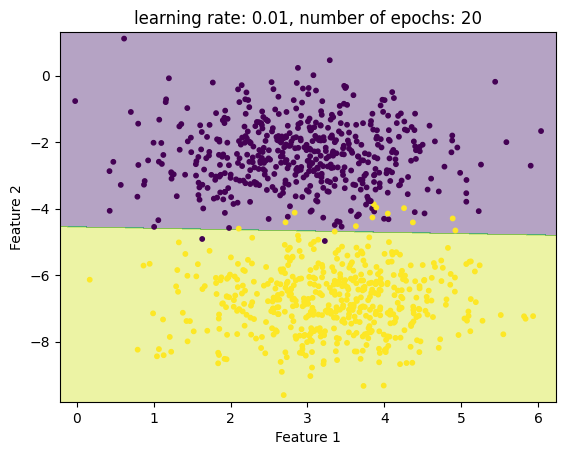

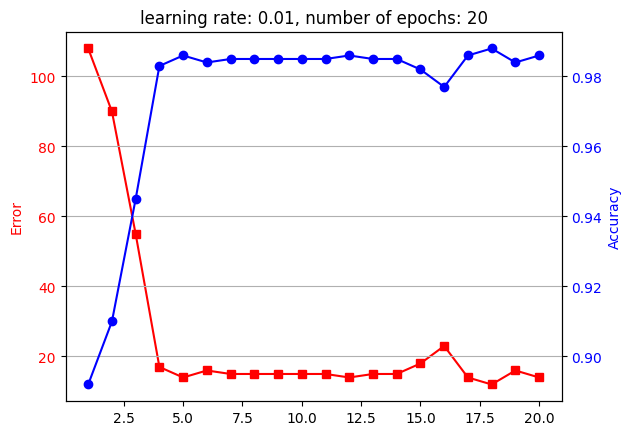

final accuracy: 0.986
final error: 14


In [207]:
train_and_plot_PQ4(X=X_lqs, y=y_lqs, learning_rate=0.01)

##### Perceptron on Linearly Inseparable Dataset

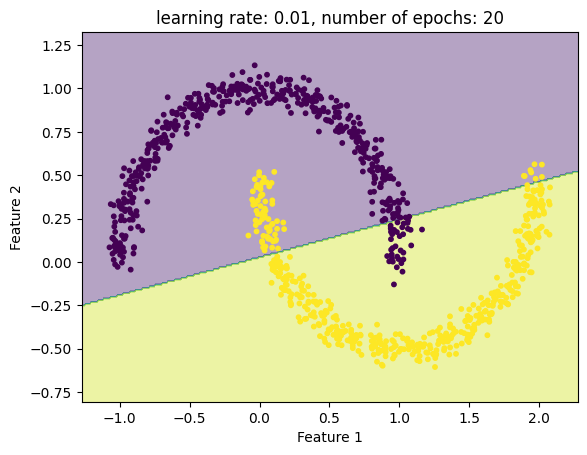

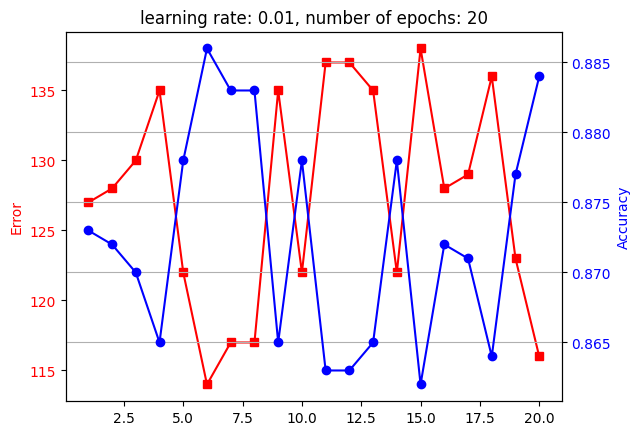

final accuracy: 0.884
final error: 116


In [208]:
train_and_plot_PQ4(X=X_li, y=y_li, learning_rate=0.01)